In [151]:
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [152]:
import datasets

In [153]:
import numpy as np
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from keras.utils import to_categorical

In [154]:
dataset_name = "iris"
DS_trn = datasets.load_trn(dataset_name)
DS_tst = datasets.load_tst(dataset_name)
X_train_valid = DS_trn.data
y_train_valid = DS_trn.target
cv_folds = DS_trn.cv_folds
X_test = DS_tst.data
y_test = DS_tst.target

X_train_valid.shape
num_classes = len(np.unique(y_train_valid))


a,b = np.unique(y_train_valid,return_counts=True)


scaler = StandardScaler().fit(X_train_valid)
X_train_valid = scaler.transform(X_train_valid)
X_test = scaler.transform(X_test)

train,valid = cv_folds[0]

X_train = X_train_valid[train,:]
y_train = y_train_valid[train]
X_valid = X_train_valid[valid,:]
y_valid = y_train_valid[valid]

In [155]:
C = 1e2
gamma = 1/(2*C*X_train.shape[0])
batch_size = X_train.shape[0]
# batch_size = 10
# initializer = tf.keras.initializers.Zeros()

inputs = keras.Input(shape=(X_train.shape[1],), name="features_in")
logits = layers.Dense(num_classes,
                      activation = "linear",
                      kernel_regularizer=regularizers.l2(gamma),
#                       kernel_initializer=initializer,
                      use_bias=False)(inputs)


model = keras.Model(inputs=inputs, outputs=logits)
optimizer = keras.optimizers.SGD(learning_rate=1e-1)

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
accuracy = tf.keras.metrics.CategoricalAccuracy()

model.compile(loss=loss, 
              optimizer=optimizer, 
              metrics=[accuracy])

print("Accuracy at (random) initialization:",
      np.mean(np.argmax(model(X_test),axis=-1) == y_test))

history = model.fit(X_train,
                    to_categorical(y_train),
                    epochs=100,
                    batch_size=batch_size,
                    validation_data=(X_valid, to_categorical(y_valid)), 
                    verbose=0)

Accuracy at (random) initialization: 0.5945945945945946


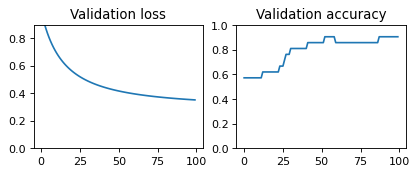

In [156]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,2),dpi=80)

ax1.set_title('Validation loss')
ax1.plot(history.history['val_loss'])
ax1.set_ylim((0,max(history.history['loss'])))

ax2.plot(history.history['val_categorical_accuracy'])
ax2.set_title('Validation accuracy')
ax2.set_ylim((0,1))

plt.show()

In [157]:
print("Final accuracy:",np.mean(np.argmax(model(X_test),axis=-1) == y_test))

Final accuracy: 0.8918918918918919
